In [1]:
def my_nth_root(x, n, tol):
    if x <= 0 or tol <= 0:
        raise ValueError("x and tol must be strictly positive")
    if n <= 1:
        raise ValueError("n must be an integer strictly greater than 1")
    
    r = x / n 
    
    while True:
        f_r = r**n - x
        f_r_prime = n * r**(n-1)
        
        r_new = r - f_r / f_r_prime
        
        if abs(r_new**n - x) < tol:
            break
        
        r = r_new
    
    return r

In [2]:
x = 27
n = 3
tol = 1e-6

approx_root = my_nth_root(x, n, tol)
print(f"The approximated {n}-th root of {x} is {approx_root}")

The approximated 3-th root of 27 is 3.000000068671529


In [3]:
def my_fixed_point(f, g, tol, max_iter):
    def F(x):
        return f(x) - g(x)
   
    a, b = -10, 10  
    fa, fb = F(a), F(b)
    
    if fa * fb > 0:
        print("f(a) and f(b) should have opposite signs. Choose a different interval.")
        return []

    for i in range(max_iter):
        m = (a + b) / 2
        fm = F(m)
        
        if abs(fm) < tol:
            return m
        
        if fa * fm < 0:
            b = m
            fb = fm
        else:
            a = m
            fa = fm

    return []

In [5]:
def f_example(x):
    return x**3 - 2*x + 1

def g_example(x):
    return x - 1

fixed_point_example = my_fixed_point(f_example, g_example, tol, max_iter)
if fixed_point_example == []:
    print("The method did not converge within the maximum number of iterations for the example functions.")
else:
    print(f"The fixed point for the example functions is approximately {fixed_point_example}")

The fixed point for the example functions is approximately -2.0000000298023224


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if x == 0:
        raise ZeroDivisionError("Division by zero is undefined for f(x) = 1/x.")
    return 1 / x

def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        print("Bisection method fails. The function must have different signs at a and b.")
        return None
    
    iter_count = 0
    while (b - a) / 2 > tol:
        iter_count += 1
        c = (a + b) / 2
        
        try:
            fc = f(c)
        except ZeroDivisionError as e:
            print(e)
            return None
        
        if fc == 0:
            return c, iter_count
        elif f(a) * fc < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, iter_count


In [12]:
a = -1
b = 1
tol = 1e-5

result = bisection_method(f, a, b, tol)
if result:
    root, iterations = result
    print("Root found:", root)
    print("Iterations:", iterations)
else:
    print("No root found.")


Division by zero is undefined for f(x) = 1/x.
No root found.


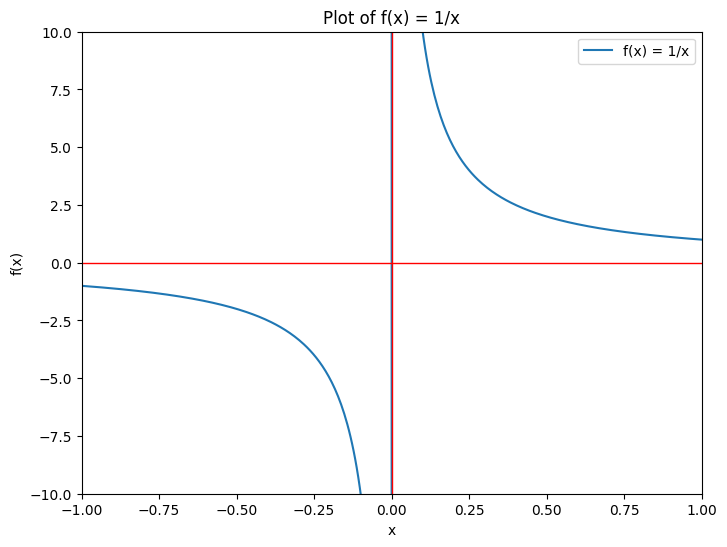

In [13]:

x = np.linspace(a, b, 400)
y = np.piecewise(x, [x != 0, x == 0], [lambda x: 1 / x, 0])

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = 1/x')
plt.axhline(0, color='red', lw=1)
plt.axvline(0, color='red', lw=1)
plt.xlim([a, b])
plt.ylim([-10, 10])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = 1/x')
plt.legend()
plt.show()


In [14]:
def my_bisection(f, a, b, tol):
    R = []  
    E = []  
    
    fa = f(a)
    fb = f(b)
    c = (a + b) / 2
    fc = f(c)
    
    R.append(c)
    E.append(abs(fc))
    
    while E[-1] >= tol:
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        
        c = (a + b) / 2
        fc = f(c)
        
        R.append(c)
        E.append(abs(fc))
    
    return R, E

In [16]:
import numpy as np
f2 = lambda x: np.sin(x) - np.cos(x)
R2, E2 = my_bisection(f2, 0, 2, 1e-2)
print("Test Case 2:")
print("R =", R2)
print("E =", E2)

Test Case 2:
R = [1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125]
E = [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948]


In [17]:
def my_newton(f, df, x0, tol):
    R = [] 
    E = [] 
    
    x = x0
    fx = f(x)
    R.append(x)
    E.append(abs(fx))
    
    while E[-1] >= tol:
        x = x - fx / df(x)
        fx = f(x)
        
        R.append(x)
        E.append(abs(fx))
    
    return R, E


In [19]:
import numpy as np
f2 = lambda x: np.sin(x) - np.cos(x)
df2 = lambda x: np.cos(x) + np.sin(x)
R2, E2 = my_newton(f2, df2, 1, 1e-5)
print("R =", R2)
print("E =", E2)

R = [1, 0.782041901539138, 0.7853981759997019]
E = [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]


In [32]:
def total_cost(x, C_ocean, C_land, L, H):
    ocean_distance = (H**2 + x**2)**0.5
    land_distance = L - x
    return C_ocean * ocean_distance + C_land * land_distance

def my_pipe_builder(C_ocean, C_land, L, H):
    f = lambda x: total_cost(x, C_ocean, C_land, L, H)
    
    a = 0
    b = L
    
    tol = 1e-6
    
    while (b - a) > tol:
        m = (a + b) / 2
        f_m = f(m)
        f_a = f(a)
        
        if (f((a + m) / 2) < f_m):
            b = m
        else:
            a = m
    
    return (a + b) / 2

In [34]:
print(my_pipe_builder(30, 10, 100, 20))

7.08007849752903


In [35]:
def f(x):
    return x**3 - x

def f_prime(x):
    return 3 * x**2 - 1

def newton_raphson(x0, tolerance=1e-6, max_iterations=10):
    x = x0
    for _ in range(max_iterations):
        x_new = x - f(x) / f_prime(x)
        print(f"x: {x:.6f}, x_new: {x_new:.6f}")
        if abs(x_new - x) < tolerance:
            break
        x = x_new
    return x

In [36]:
x0 = 1 / (5**0.5)  # or -1 / (5**0.5)
newton_raphson(x0)

x: 0.447214, x_new: -0.447214
x: -0.447214, x_new: 0.447214
x: 0.447214, x_new: -0.447214
x: -0.447214, x_new: 0.447214
x: 0.447214, x_new: -0.447214
x: -0.447214, x_new: 0.447214
x: 0.447214, x_new: -0.447214
x: -0.447214, x_new: 0.447214
x: 0.447214, x_new: -0.447214
x: -0.447214, x_new: 0.447214


0.4472135954999579